In [1]:
# Importanto as bibliotecas necessárias

%matplotlib notebook 
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
import numpy as np
from scipy.signal import lsim
import control as ctl
import matplotlib.pyplot as plt
from control import (TransferFunction)

<ipython-input-1-dbdd7ad866c8>:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf')


# Plote o Lugar das Raízes(raízes da malha fechada) indicando as raízes quando K=0 e quando K=∞ (polos e zeros da malha aberta)

## Sistema A

<h3 align="center">Lugar das Raízes</h3> 

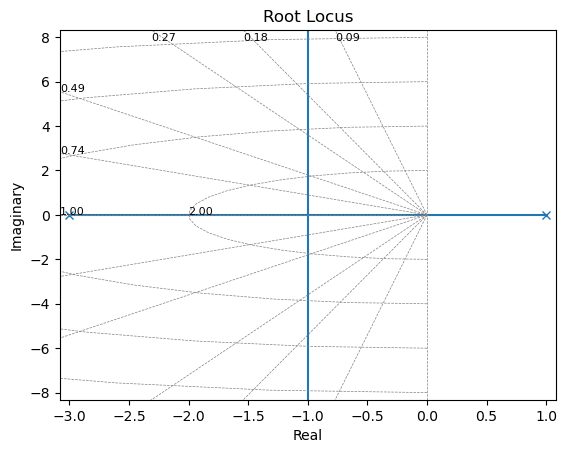

In [2]:
# Definindo a função transferência
H1 = TransferFunction(1, [1,2,-3])

# plotando o gráfico do lugar das raízes
plt.figure(1)
out = ctl.rlocus(H1, kvect=None, xlim=None, ylim=None, plotstr=None, plot=True, print_gain=None, grid=None)

<h3 align="center">Encontrando os polos e zeros da malha aberta</h3> 


      1
-------------
s^2 + 2 s - 3

Os polos são:  [-3.  1.]


(array([-3.,  1.]), array([], dtype=float64))

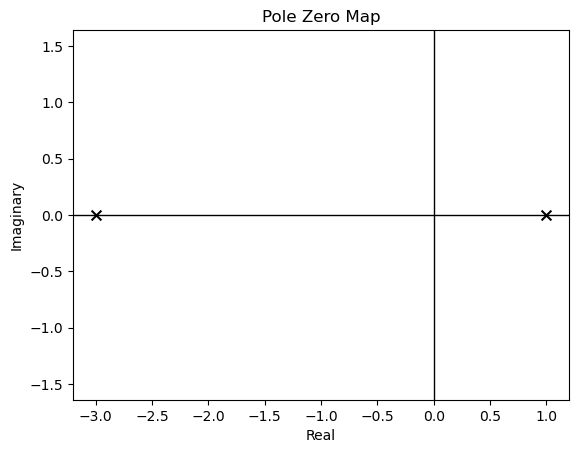

In [3]:
# Printando a função transferência

print(H1)

# Encontrando polos e zeros com "ctl.pole"

poles_H1= ctl.pole(H1)
print("Os polos são: ",poles_H1)

# Plotando o gráfico dos polos e zeros

plt.figure(2)
ctl.pzmap(H1, plot=True, grid=False, title='Pole Zero Map')

## Sistema B

<h3 align="center">Lugar das Raízes</h3> 


     s + 20
-----------------
s^3 + 5 s^2 + 6 s



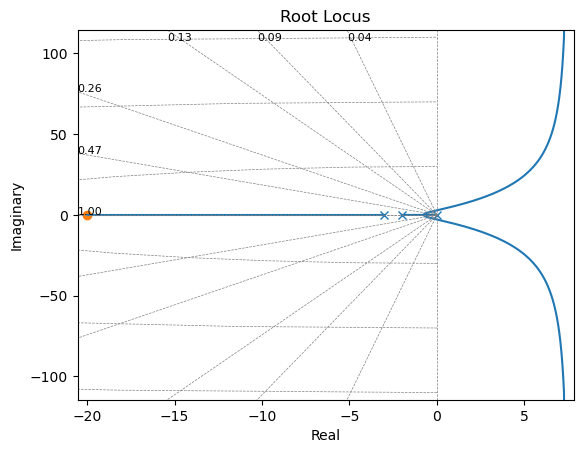

In [24]:
# Definindo a função transferência

H2 = TransferFunction([1,20], [1,5,6,0])
print(H2)

# plotando o gráfico do lugar das raízes

plt.figure(3)
out = ctl.rlocus(H2, kvect=None, xlim=None, ylim=None, plotstr=None, plot=True, print_gain=None, grid=None)

<h3 align="center">Encontrando os polos e zeros da malha aberta</h3> 


     s + 20
-----------------
s^3 + 5 s^2 + 6 s

[-3. -2.  0.]


(array([-3., -2.,  0.]), array([-20.]))

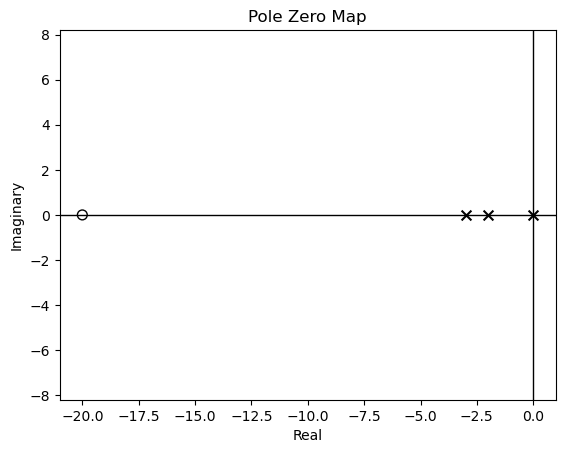

In [5]:
# Printando a função transferência

print(H2)

# Encontrando polos e zeros com "ctl.pole"

poles_H2= ctl.pole(H2)
print(poles_H2)

# Plotando o gráfico dos polos e zeros

plt.figure(4)
ctl.pzmap(H2, plot=True, grid=False, title='Pole Zero Map')

# Calcule o valor de K que torna o sistema marginalmente estável (Kmarg)

## Sistema A

Função transferência:

\begin{equation}
G(s) = \frac{k}{s^2 + 2s + k -3}
\end{equation}

Equação característica:

\begin{equation}
s^2 + 2s + k-3 = 0
\end{equation}


Comparando a eq. acima com:
\begin{equation}
s^2 + 2\xi \omega_n s + \omega_n ^2 = 0
\end{equation}

Tem-se:
\begin{equation}
\omega_n = \sqrt{k-3}
\end{equation}

Assim temos:

\begin{equation}
2 \xi \sqrt{k-3} = 2 \Longrightarrow \xi = \frac{1}{\sqrt{k-3}}
\end{equation}


Para que o sistema seja marginalmente estável, ou seja para encontrar Kmarg, 𝜉 = 0, assim:

\begin{equation} 
\xi = 0 \Longleftrightarrow k_{marg} = 3
\end{equation}

## Sistema B

Função transferência:

\begin{equation}
G(s) = \frac{k (20+s)}{s^3 + 5 s^2 + (k + 6)s + 20 k}
\end{equation}

Equação característica:

\begin{equation}
s^3 + 5 s^2 + (k + 6)s + 20 k = 0
\end{equation}


Condição de estabilidade:

\begin{equation}
p_i = \sigma_i \pm j \omega_i
\end{equation}

Para ser marginalmente estável em determinado n, teremos:

\begin{equation}
p_n = 0 \pm j \omega_n
\end{equation}

Assim:

\begin{equation}
(j \omega_n)^3 + 5 (j \omega_n)^2 + (k + 6)(j \omega_n) + 20 k = 0
\end{equation}


\begin{equation}
\Longrightarrow 20k-5 \omega_n^2 - j \omega_n (\omega_n^2 -6-k) = 0
\end{equation}


\begin{equation}
\begin{cases}
j \omega_n (\omega_n^2 -6-k) = 0 \Longrightarrow \omega_n^2 = k+6 \\
20k-5 \omega_n^2 = 0 \Longrightarrow 20k = 5(k+6) =0  \Longrightarrow 15k = 30 \Longrightarrow k_{marg} = 2
\end{cases}
\end{equation}


# Use o critério de Routh e compare com o valor de Kmarg encontrado no item 2

## Sistema A

Montando o arranjo de Routh para a equação:

\begin{equation}
s^2 + 2s + k-3 = 0
\end{equation}

Tem-se:


$\begin{matrix}
s^2 & 1 & k-3 \\
s^1 & 2 & 0\\ 
s^0 & k-3 & 
\end{matrix}$

Portanto:
    
\begin{equation}
k-3 > 0  \Longrightarrow k > 3
\end{equation}

Dessa forma, encontrou-se o mesmo valor de k no item 2.

## Sistema B

Montando o arranjo de Routh para a equação:

\begin{equation}
s^3 + 5 s^2 + (k + 6)s + 20 k = 0
\end{equation}

Tem-se:

$\begin{matrix}
s^3 & 1 & k+6\\
s^2 & 5 & 20k\\ 
s^1 & 6-3k & 0\\
s^0 &  20k & 0
\end{matrix}$

Portanto:
    
\begin{equation}
6-3k > 0  \Longrightarrow k < 2
\end{equation}

Dessa forma, encontrou-se o mesmo valor de 𝐾𝑚𝑎𝑟𝑔 no item 2.

# Plote o  diagram  de  Nyquist  para  a  malha  aberta  do  sistema  com  ganhos maiores, iguais e menores que Kmarg


## Sistema A

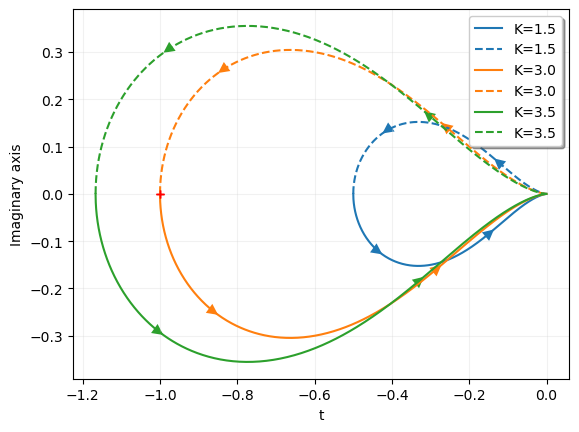

In [6]:
# Plotando o diagrama com K = 1.5 < K = 3 (Kmarg) < K = 3.5

plt.figure(5)
ctl.nyquist_plot(1.5*H1,label='K=1.5')
ctl.nyquist_plot(3*H1,label='K=3.0')
ctl.nyquist_plot(3.5*H1,label='K=3.5')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()

## Sistema B

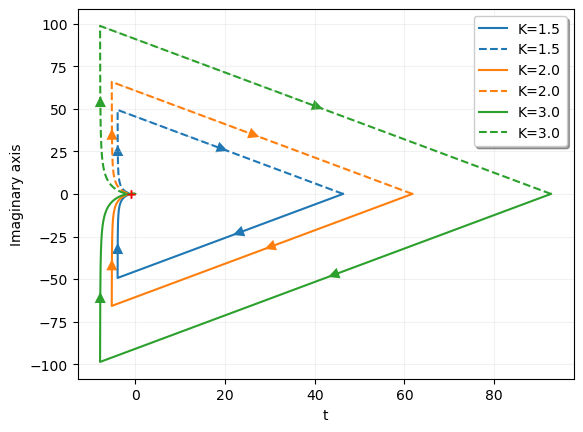

In [20]:
# Plotando o diagrama com K = 1.5 < K = 2.0 (Kmarg) < K = 3.0

plt.figure(6)
ctl.nyquist_plot(1.5*H2,label='K=1.5')
ctl.nyquist_plot(2.*H2,label='K=2.0')
ctl.nyquist_plot(3.*H2,label='K=3.0')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()

# Indique se  o  sistema  é  estável  ou  instável  de  acordo  com  o  número  de  polos instáveis da malha aberta (Critério de Nyquist).

## Sistema A

In [8]:
poles_H1= ctl.pole(H1)
print("Os polos são: ",poles_H1)

Os polos são:  [-3.  1.]


Dessa forma, tem-se um polo instável e assim:
\begin{equation}
P = 1
\end{equation}

Pelo Critério de Nyquist:
\begin{equation}
Z = N + P = 0
\end{equation}

Dessa forma:

\begin{equation}
N = -1 \rightarrow Z = 0 \rightarrow Estável \Longleftrightarrow k > 3
\end{equation}

\begin{equation}
N = 0 \rightarrow Z = 1 \rightarrow Instável \Longleftrightarrow k < 3
\end{equation}

## Subsistema B

In [9]:
poles_H2= ctl.pole(H2)
print("Os polos são: ",poles_H2)

Os polos são:  [-3. -2.  0.]


Dessa forma, não tem-se um polo instável e assim:
\begin{equation}
P = 0
\end{equation}

Pelo Critério de Nyquist:
\begin{equation}
Z = N + P = 0
\end{equation}

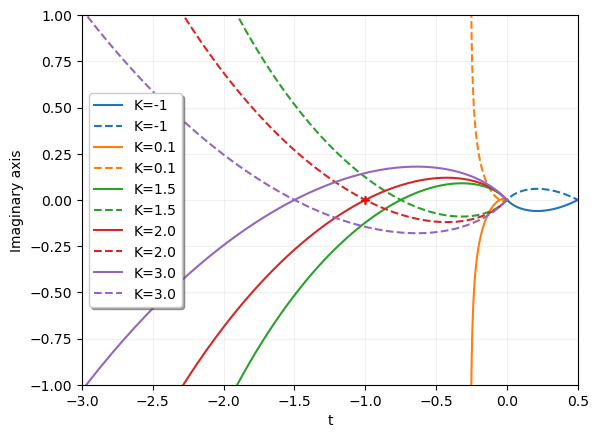

In [34]:
# Plotando o diagrama com aproximação maior em t = -1

plt.figure(8)
ctl.nyquist_plot(-1*H2,label='K=-1')
ctl.nyquist_plot(0.1*H2,label='K=0.1')
ctl.nyquist_plot(1.5*H2,label='K=1.5')
ctl.nyquist_plot(2.*H2,label='K=2.0')
ctl.nyquist_plot(3.*H2,label='K=3.0')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.ylim(-1,1)
plt.xlim(-3,.5)
plt.xlabel('t')
plt.show()

Dessa forma:

Para K = − 1, N = − 1, assim Z = N + P = − 1 + 0 = − 1, sistema instável.

Para K = 0.1, N = 0, assim Z = N + P = 0 + 0 = 0, sistema estável.

Para K = 1, N = 0, assim Z = N + P = 0 + 0 = 0, sistema estável.

Para K = 2, sistema marginalmente estável.

Para K = 3, N = 1, assim Z = N + P = 1 + 0 = 1, sistema instável.